In [14]:
# 读取数据
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('./data/train_tag.csv',encoding='gbk')
data.drop_duplicates(inplace=True)


In [15]:
# 删除无关特征
drop_list=[]
for i in data.columns:
    count=data[i].count()
    if len(list(data[i].unique())) in [1,count,count-1]:
        drop_list.append(i)
print(drop_list)
data.drop(drop_list,axis=1,inplace=True)

['id']


In [16]:
# 了解数据整体情况
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   flag                             39923 non-null  int64  
 1   gdr_cd                           39187 non-null  object 
 2   age                              39923 non-null  int64  
 3   mrg_situ_cd                      39187 non-null  object 
 4   edu_deg_cd                       26751 non-null  object 
 5   acdm_deg_cd                      39186 non-null  object 
 6   deg_cd                           18224 non-null  object 
 7   job_year                         39430 non-null  float64
 8   ic_ind                           39430 non-null  float64
 9   fr_or_sh_ind                     39430 non-null  float64
 10  dnl_mbl_bnk_ind                  39430 non-null  float64
 11  dnl_bind_cmb_lif_ind             39430 non-null  float64
 12  hav_car_grp_ind   

atdd_type                      0.592741
l12_mon_gld_buy_whl_tms        0.012524
l12_mon_insu_buy_whl_tms       0.012524
frs_agn_dt_cnt                 0.012524
vld_rsk_ases_ind               0.012524
cust_inv_rsk_endu_lvl_cd       0.012524
hav_car_grp_ind                0.012524
tot_ast_lvl_cd                 0.012524
pot_ast_lvl_cd                 0.012524
l12mon_buy_fin_mng_whl_tms     0.012524
l12_mon_fnd_buy_whl_tms        0.012524
l6mon_agn_ind                  0.012524
crd_card_act_ind               0.012524
l1y_crd_card_csm_amt_dlm_cd    0.012524
dnl_mbl_bnk_ind                0.012349
loan_act_ind                   0.012349
hav_hou_grp_ind                0.012349
ovd_30d_loan_tot_cnt           0.012349
his_lng_ovd_day                0.012349
hld_crd_card_grd_cd            0.012349
dtype: float64


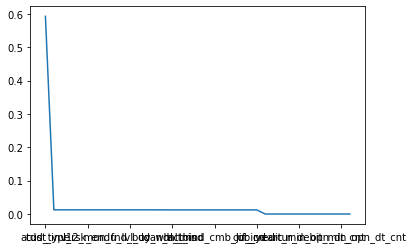

In [17]:
# 分析数值型数据缺失情况
# % matplotlib inline
data_num=data.select_dtypes('number').copy()
data_num_miss_rate=1-(data_num.count()/len(data_num))
data_num_miss_rate.sort_values(ascending=False,inplace=True)
print(data_num_miss_rate[:20])
data_num_miss_rate.plot()

Text(0, 0.5, '缺失占比')

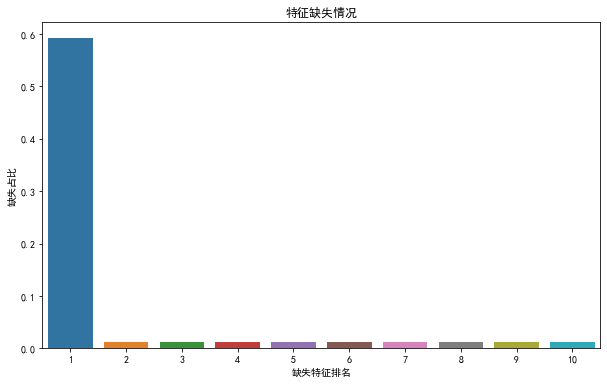

In [18]:
# 画图了解缺失情况
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
data_num=data.select_dtypes('number').copy()
data_num_miss_rate=1-(data_num.count()/len(data_num))
data_num_miss_rate.sort_values(ascending=False,inplace=True)
fig,ax1=plt.subplots(figsize=(10,6))
sns.barplot([1,2,3,4,5,6,7,8,9,10],data_num_miss_rate[:10].values,ax=ax1)
ax1.set_title('特征缺失情况')
ax1.set_xlabel('缺失特征排名')
ax1.set_ylabel('缺失占比')

In [19]:
# 数据处理
data_str=data.select_dtypes(exclude='number').copy()
data_str.describe()
data_str['reg_preference_for_trad'].fillna(data_str['reg_preference_for_trad'].mode()[0],inplace=True)

dic={}
for i,val in enumerate(list(data_str['reg_preference_for_trad'].unique())):
    dic[val]=i
data_str['reg_preference_for_trad']=data_str['reg_preference_for_trad'].map(dic)

data_str['latest_query_time_month']=pd.to_datetime(data_str['latest_query_time']).dt.month
data_str['latest_query_time_weekday']=pd.to_datetime(data_str['latest_query_time']).dt.weekday

data_str['loans_latest_time_month']=pd.to_datetime(data_str['loans_latest_time']).dt.month
data_str['loans_latest_time_weekday']=pd.to_datetime(data_str['loans_latest_time']).dt.weekday

data_str.drop(['latest_query_time','loans_latest_time'],axis=1,inplace=True)
for i in data_str.columns:
    data_str[i].fillna(data_str[i].mode()[0],inplace=True)

KeyError: 'reg_preference_for_trad'

In [ ]:
# 划分训练集测试集
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features=[x for x in data_all.columns if x not in ['status']]
X=data_all[features]
y=data_all['status']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
# 特征归一化
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.fit_transform(X_test)

In [ ]:
# 模型评估
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt

def model_metrics(clf,X_train,X_test,y_train,y_test):
    # 预测
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    y_train_proba=clf.predict_proba(X_train)[:,1]
    y_test_proba=clf.predict_proba(X_test)[:,1]

    # 准确率
    print('[准确率]',end='')
    print('训练集：{:.4f}'.format(accuracy_score(y_train,y_train_pred)),end='')
    print('测试集：{:.4f}'.format(accuracy_score(y_test,y_test_pred)),end='')

    # 精准率
    print('[精准率]',end='')
    print('训练集：{:.4f}'.format(precision_score(y_train,y_train_pred)),end='')
    print('测试集：{:.4f}'.format(precision_score(y_test,y_test_pred)),end='')

    # 召回率
    print('[召回率]',end='')
    print('训练集：{:.4f}'.format(recall_score(y_train,y_train_pred)),end='')
    print('测试集：{:.4f}'.format(recall_score(y_test,y_test_pred)),end='')

    # f1-score
    print('[f1-score]',end='')
    print('训练集：{:.4f}'.format(f1_score(y_train,y_train_pred)),end='')
    print('测试集：{:.4f}'.format(f1_score(y_test,y_test_pred)),end='')

    # auc取值：用roc_auc_score或auc
    print('[auc值]',end='')
    print('训练集：{:.4f}'.format(roc_auc_score(y_train,y_train_proba)),end='')
    print('测试集：{:.4f}'.format(roc_auc_score(y_test,y_test_proba)),end='')

    # roc曲线
    fpr_train,tpr_train,thresholds_train=roc_curve(y_train,y_train_proba,pos_label=1)
    fpr_test,tpr_test,thresholds_test=roc_curve(y_test,y_test_proba,pos_label=1)

    label=['Train - AUC:{:.4f'.format(auc(fpr_train,tpr_train)),
           'Test - AUC:{:.4f'.format(auc(fpr_test,tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0,1],[0,1],'d--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label,loc=4)
    plt.title('ROC curve')

In [ ]:
# 模型
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.metrics import confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

plt.rcParams['font.family']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

# rf
rf=RandomForestClassifier(random_state=2018)
param={'n_estimators':[40,60,800],'max_depth':[i for i in range(6,10)],
       'criterion':['entropy'],'min_samples_split':[5,6,7,8]}
gsearch=GridSearchCV(rf,param_grid=param,scoring='roc_auc',cv=4)
gsearch.fit(X_train,y_train)
print('最佳参数: ',gsearch.best_params_)
print('训练集的最佳分数：',gsearch.best_score_)
print('测试集的最佳分数: ',gsearch.score(X_test,y_test))

rf=RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_split=7,n_estimators=800)
rf.fit(X_train,y_train)
model_metrics(rf,X_train,X_test,y_train,y_test)

# svm_linear
svm_linear=svm.SVC(kernel='linear',probability=True).fit(X_train,y_train)
model_metrics(svm_linear,X_train,X_test,y_train,y_test)
# svm poly
svm_poly=svm.SVC(C=0.01,kernel='poly',probability=True).fit(X_train,y_train)
model_metrics(svm_poly,X_train,X_test,y_train,y_test)

# svm_rbf
svm_rbf=svm.SVC(kernel='rbf',probability=True,gamma=0.01,C=0.1)
svm_rbf.fit(X_train,y_train)
model_metrics(svm_rbf,X_train,X_test,y_train,y_test)

# svm_sigmoid
svm_sigmoid=svm.SVC(C=0.05,kernel='sigmoid',probability=True)
svm_sigmoid.fit(X_train,y_train)
model_metrics(svm_sigmoid,X_train,X_test,y_train,y_test)

# dt
dt=DecisionTreeClassifier(max_depth=9,min_samples_split=100,min_samples_leaf=90,max_features=9)
dt.fit(X_train,y_train)
model_metrics(dt,X_train,X_test,y_train,y_test)

# lr
lr=LogisticRegression(C=0.04,penalty='l1')
model_metrics(lr,X_train,X_test,y_train,y_test)


# lgb
lgb=LGBMClassifier(learning_rate=0.1,n_estimators=50,max_depth=3,
                  min_child_weight=7,gamma=0,subsample=0.5,colsample_bytree=0.8,
                  reg_alpha=1e-5,nthread=4,scale_pos_weight=1)
model_metrics(lgb,X_train,X_test,y_train,y_test)

# 模型融合
sclf_lr=StackingClassifier(classifiers=[lr,svm_linear,svm_rbf,rf,lgb],
                           meta_classifier=lr,
                           use_probas=True,
                           average_probas=True,
                           use_features_in_secondary=True)
sclf_lr.fit(X_train,y_train.values)
model_metrics(sclf_lr,X_train,X_test,y_train,y_test)
